In [1]:
import pandas as pd 
df = pd.read_csv("diabetes.csv") 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df = df.drop_duplicates()
df 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df = df.drop(columns=['Pregnancies','SkinThickness']) 
df

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,101,76,180,32.9,0.171,63,0
764,122,70,0,36.8,0.340,27,0
765,121,72,112,26.2,0.245,30,0
766,126,60,0,30.1,0.349,47,1


In [4]:
df.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 7)

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [7]:
corr_matrix = df.corr()

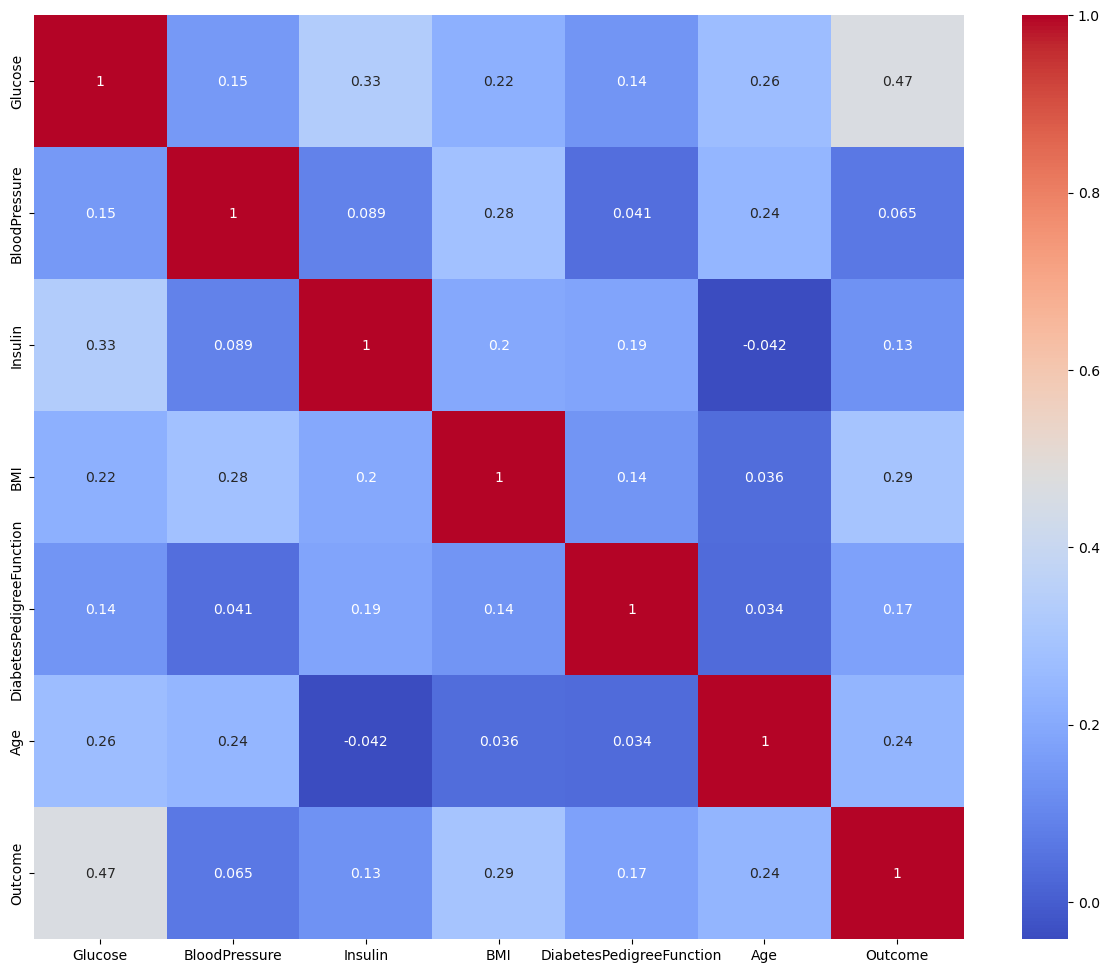

In [8]:
plt.figure(figsize=(15,12)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 
plt.show()

In [9]:
df.isnull()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False


In [11]:

df.dtypes

Glucose                       int64
BloodPressure                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
from sklearn.preprocessing import StandardScaler 
x = df.drop(columns='Outcome') 
y = df['Outcome']  
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)  

In [14]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
models = { 
'Logistic regression': LogisticRegression(),
'Random Forest': RandomForestClassifier(),
'Support Vector Machine': SVC(probability=True)
}   

for name, model in models.items():
    model.fit(x_train, y_train)
    print(f"{name} trained.") 


Logistic regression trained.
Random Forest trained.
Support Vector Machine trained.


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

for name, model in models.items():
    y_pred = model.predict(x_test) 
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(x_test)[:,1])}\n")

Logistic regression Performance:
Accuracy: 0.7597402597402597
Precision: 0.6730769230769231
Recall: 0.6363636363636364
F1 Score: 0.6542056074766355
ROC AUC Score: 0.7944903581267218

Random Forest Performance:
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
ROC AUC Score: 0.8193755739210284

Support Vector Machine Performance:
Accuracy: 0.7467532467532467
Precision: 0.66
Recall: 0.6
F1 Score: 0.6285714285714286
ROC AUC Score: 0.8022038567493113



<Axes: >

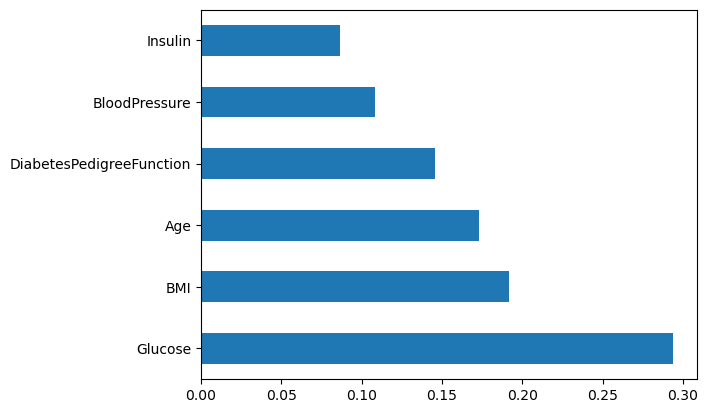

In [21]:
# For models that support feature importance, like Random Forest
importances = models['Random Forest'].feature_importances_
feature_importance = pd.Series(importances, index=df.columns[:-1])
feature_importance.nlargest(10).plot(kind='barh')


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Predict probabilities of having diabetes
y_prob = model.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Set a threshold (e.g., 0.5) for high risk
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

# Evaluate the model
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Identify high-risk individuals
high_risk_indices = (y_prob >= threshold).nonzero()[0]
high_risk_data = x_test[high_risk_indices]
print("High-risk individuals' data:", high_risk_data)


ROC AUC Score: 0.8104683195592287
[[77 22]
 [16 39]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

High-risk individuals' data: [[-0.56004775  0.14964075  0.95685965  0.72438168 -0.44660398  1.85143417]
 [-0.12188771 -3.57259724 -0.69289057  0.22939662  1.38962817  0.91546889]
 [ 1.03610667  0.14964075  0.40115431 -0.08790149 -0.40432232  0.31985461]
 [ 0.81702665  0.45982725 -0.69289057  0.2167047  -0.76673656  2.7023117 ]
 [ 1.8185353   1.338689   -0.69289057  0.28016432 -0.92982297  2.27687294]
 [ 1.94372388 -3.57259724 -0.69289057 -0.4559673  -0.78485727  0.23476686]
 [ 0.59794663 -0.2122435   0.4358859   1.34628598 -0.12345128 -0.78628618]
 [ 0.25367803  0.35643175  0.36642273  0.49592704 -0.5794892   0.4

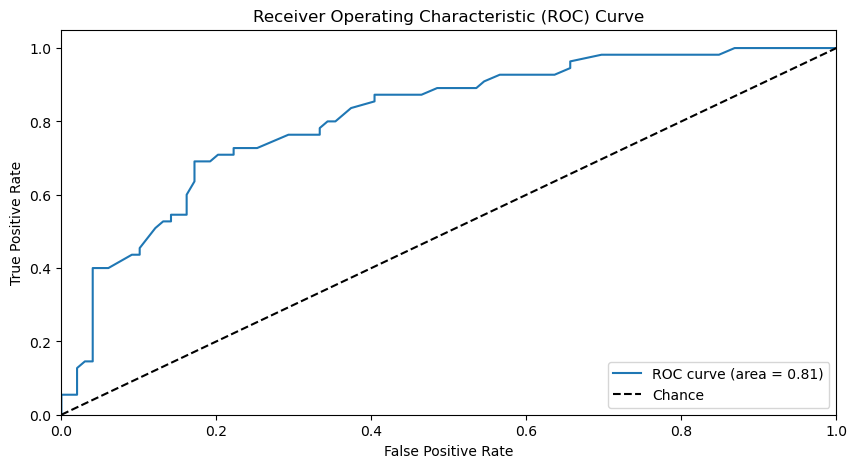

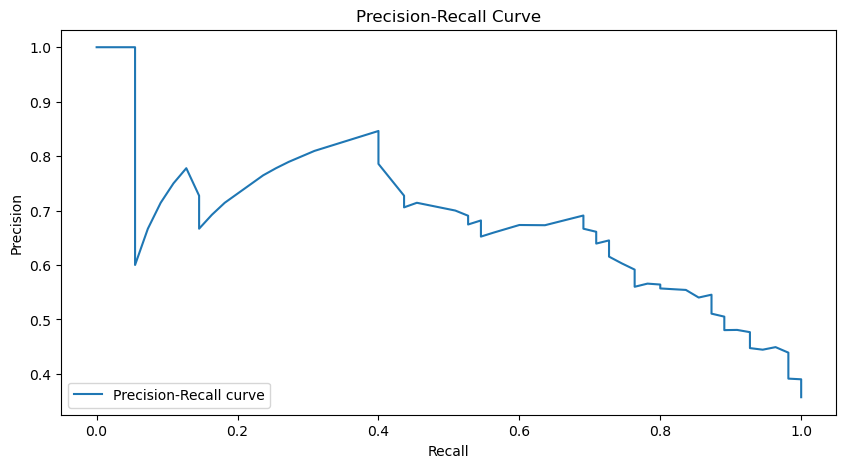

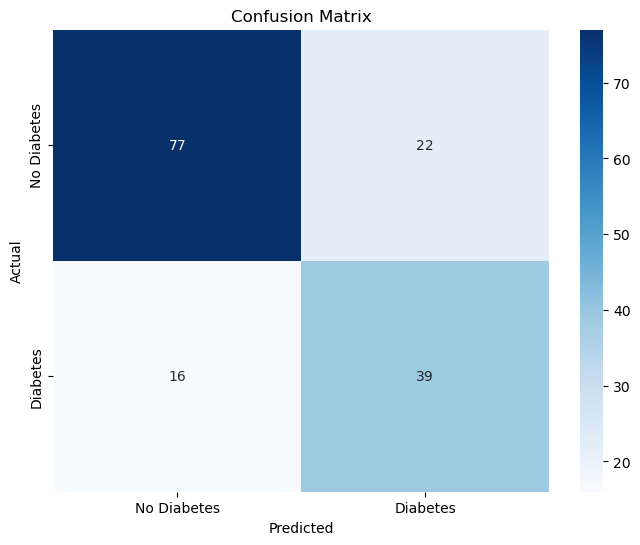

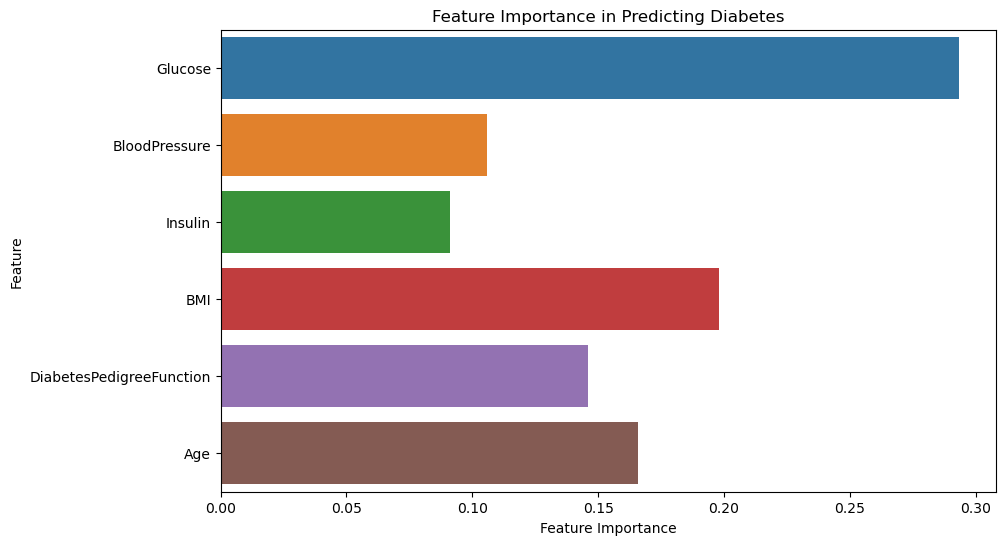

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

# Predict probabilities for the positive class
y_prob = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix Heatmap
y_pred = (y_prob >= threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Plot (for tree-based models)
feature_importances = model.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Diabetes')
plt.show()
